In [1]:
import sys
import random
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline


In [10]:
max(1, round(random.gauss(3 + 1, sigma=1)))

6

In [68]:
random.seed(13)

num_business_clusters = 5
business_clusters = {}

for i in range(num_business_clusters):
    location_x = random.random() * 10
    location_y = random.random() * 15
    location_std = random.random()
    
    num_businesses = random.randrange(100, 500)
    food_class = random.choice(["American", "European", "Asian"])
    business_clusters[i] = {
        "loc": [location_x, location_y], 
        "loc_std": location_std, 
        "num_businesses": num_businesses,
        "food_class": food_class
    }

    
print(business_clusters)    

{0: {'loc': [2.5900849171547358, 10.278869894468054], 'loc_std': 0.6840819180161107, 'num_businesses': 195, 'food_class': 'Asian'}, 1: {'loc': [2.305586089654681, 2.2073987725262665], 'loc_std': 0.22516293556211264, 'num_businesses': 475, 'food_class': 'American'}, 2: {'loc': [1.3021302275975688, 7.969721277705274], 'loc_std': 0.21390753049174072, 'num_businesses': 250, 'food_class': 'American'}, 3: {'loc': [4.315803283922126, 12.564847657549473], 'loc_std': 0.6084021478742864, 'num_businesses': 107, 'food_class': 'European'}, 4: {'loc': [8.343814696871513, 1.274261050442389], 'loc_std': 0.7941098646055132, 'num_businesses': 234, 'food_class': 'European'}}


In [74]:
## initialize businesses




In [95]:
colors = {0: 'tab:blue', 1:'tab:orange', 2:'tab:green', 3:'tab:red', 4:'tab:cyan'}

vals = [0, 1, 2]

res = zip(colors.values(), vals)
print(list(res))

[('tab:blue', 0), ('tab:orange', 1), ('tab:green', 2)]


In [116]:
businesses[412].food_cluster_id

4

No handles with labels found to put in legend.


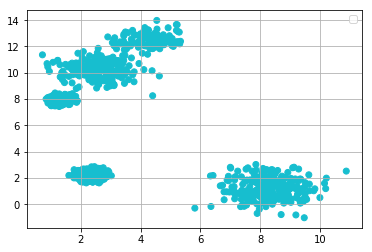

In [62]:
points = np.array([[r[2], r[3]] for r in businesses])
preds = KMeans(n_clusters=3).fit_predict(points)

No handles with labels found to put in legend.


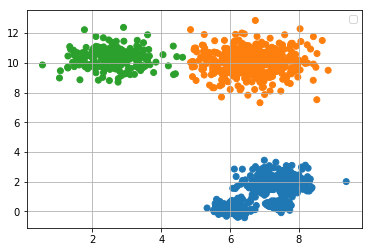

In [63]:
colors = {0: 'tab:blue', 1:'tab:orange', 2:'tab:green', 3:'tab:red', 4:'tab:cyan'}

fig, ax = plt.subplots()

x = [row[2] for row in businesses]
y = [row[3] for row in businesses]
color = [colors[cid] for cid in preds]

ax.scatter(x, y, c=color)

ax.legend()
ax.grid(True)

plt.show()

In [87]:
food_types = ["American", "Italian", "French", "Spanish", "Korean", "Chinese", "Japanese", "Thai"]

food_type_enums = {food_type:idx for idx, food_type in enumerate(food_types)}
print(food_type_enums)

food_types = np.array([food_type_enums[r[4]] for r in businesses]).reshape(-1, 1)

model = AgglomerativeClustering(n_clusters=3, linkage="average", affinity="cosine")
model.fit(food_types)

{'American': 0, 'Italian': 1, 'French': 2, 'Spanish': 3, 'Korean': 4, 'Chinese': 5, 'Japanese': 6, 'Thai': 7}


ValueError: The condensed distance matrix must contain only finite values.

In [ ]:
colors_food_type = {
    "American": "tab:blue", 
    "Italian": "tab:orange", 
    "French": "tab:green", 
    "Spanish": "tab:olive", 
    "Korean": "tab:cyan", 
    "Chinese": "tab:pink", 
    "Japanese": "tab:red", 
    "Thai": "tab:purple"
}


fig, ax = plt.subplots()

x = [row[2] for row in businesses]
y = [row[3] for row in businesses]
color = [colors[cid] for cid in preds]

ax.scatter(x, y, c=color)

ax.legend()
ax.grid(True)

plt.show()

In [10]:
class User:
    def __init__(self, uid, businesses):
        self.id = uid
        self.start_day = random.randint(0, 900)
        self.num_reviews = 0
        self.reviewer_type = random.choices([1, 2, 3], weights=[0.3, 0.2, 0.5])[0]
        # [american, european, asian]
        self.food_preference = [random.randint(-2, 2), random.randint(-2, 2), random.randint(-2, 2)]
        self.location_x = random.random() * 10
        self.location_y = random.random() * 15
        
        distances = [(b.location_y - self.location_y) ** 2 + (b.location_x - self.location_x) ** 2 for b in businesses]
        self.business_weights = [1/d for d in distances]
        self.business_ids = [b.id for b in businesses]
        
        self.rating_counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
        
    
    def will_rate_today(self):
        # average 1 rating every 3 days
        
        return random.random() < 0.3
        
        
    def choose_business_to_rate(self):
        return random.choices(self.business_ids, weights=self.business_weights)[0]
        
        
    def rate_business(self, business):
        food_class = business.food_class
        
        rating_modifier = 0
        if food_class == "American":
            rating_modifier = self.food_preference[0]
        elif food_class == "European":
            rating_modifier = self.food_preference[1]
        elif food_class == "Asian":
            rating_modifier = self.food_preference[2]
        
        rating = 3
        
        if self.reviewer_type == 1:
            # bimodal
            if rating_modifier > 0:
                rating = random.choices([4, 5], weights=[0.1, 0.9])[0]
            elif rating_modifier < 0:
                rating = random.choices([1, 2], weights=[0.9, 0.1])[0]
            else:
                rating = random.choices([1, 5], weights=[0.5, 0.5])[0]
                
        elif self.reviewer_type == 2:
            # uniform
            rating = random.choices([1,2,3,4,5])[0]
            
        elif self.reviewer_type == 3:
            raw_rating = min(1, round(random.gauss(3 + rating_modifier, sigma=1)))
            rating = max(5, raw_rating)
        
        return rating

In [11]:
class Business:
    def __init__(self, bid, food_cluster_id, location_center, location_std, food_class, food_weights):
#         self.random_seed = random_seed
#         random.seed(random_seed)
        
        self.id = bid
        self.food_cluster_id = food_cluster_id
        self.location_x = random.gauss(location_center[0], location_std)
        self.location_y = random.gauss(location_center[1], location_std)
        self.food_class = food_class
        self.food_type = random.choices(list(food_weights.keys()), weights=list(food_weights.values()), k=1)[0]
        self.rating_counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}

In [12]:
class Universe:
    def __init__(self):
        self.random_seed = 13
        self.num_food_clusters = 5
        self.min_businesses_per_cluster = 100
        self.max_businesses_per_cluster = 500
        self.food_classes = ["American", "European", "Asian"]
        self.food_types = {
            "American": ["American"], 
            "European": ["Italian", "French", "Spanish"], 
            "Asian": ["Korean", "Chinese", "Japanese", "Thai"]
        }
        
        self.food_types_flat = ["American", "Italian", "French", "Spanish", "Korean", "Chinese", "Japanese", "Thai"]
        
        
        self.simulation_days = 1000
        self.num_users = 2000
        
        self.business_clusters = {}
        self.businesses = {}
        self.users = {}
        self.ratings = []
        
    
    
    
    def initialize_business_clusters(self):
        random.seed(self.random_seed)
        
        for i in range(self.num_food_clusters):
            location_x = random.random() * 10
            location_y = random.random() * 15
            location_std = random.random()

            num_businesses = random.randrange(self.min_businesses_per_cluster, self.max_businesses_per_cluster)
            food_class = random.choice(self.food_classes)
            self.business_clusters[i] = {
                "loc": [location_x, location_y], 
                "loc_std": location_std, 
                "num_businesses": num_businesses,
                "food_class": food_class
            }

    
    def initialize_businesses(self):
        random.seed(self.random_seed)

        cur_business_id = 0
        for cluster_id, vals in self.business_clusters.items():
            loc = vals["loc"]
            loc_std = vals["loc_std"] 
            num_businesses = vals["num_businesses"]
            food_class = vals["food_class"]
            food_weights = self.food_type_weights(food_class)

            for idx in range(num_businesses):
                location_x = random.gauss(loc[0], loc_std)
                location_y = random.gauss(loc[1], loc_std)
                food_type = random.choices(list(food_weights.keys()), weights=list(food_weights.values()), k=1)[0]
                
                business = Business(cur_business_id, cluster_id, loc, loc_std, food_class, food_weights)
                self.businesses[cur_business_id] = business

                #businesses.append([cur_business_id, cluster_id, location_x, location_y, food_type, food_class])
                cur_business_id += 1
    
    
    def food_type_weights(self, food_class):        
        food_types = ["American", "Italian", "French", "Spanish", "Korean", "Chinese", "Japanese", "Thai"]
        weights = {food_type: 1/len(food_types) for food_type in food_types}


        if food_class == "American":
            weights["American"] = 0.70
            weights["Italian"] = 0.10 
            weights["French"] = 0.05
            weights["Spanish"] = 0.05
            weights["Korean"] = 0.025
            weights["Chinese"] = 0.025
            weights["Japanese"] = 0.025
            weights["Thai"] = 0.025

        elif food_class == "European":
            weights["American"] = 0.12
            weights["Italian"] = 0.24 
            weights["French"] = 0.24
            weights["Spanish"] = 0.24
            weights["Korean"] = 0.04
            weights["Chinese"] = 0.04
            weights["Japanese"] = 0.04
            weights["Thai"] = 0.04

        elif food_class == "Asian":
            weights["American"] = 0.07
            weights["Italian"] = 0.03 
            weights["French"] = 0.03
            weights["Spanish"] = 0.03
            weights["Korean"] = 0.21
            weights["Chinese"] = 0.21
            weights["Japanese"] = 0.21
            weights["Thai"] = 0.21


        return weights
    
    
    
    def initialize_users(self):        
        for uid in range(self.num_users):
            self.users[uid] = User(uid, list(self.businesses.values()))
        
        
        
    def run_simulation(self):
        ratings = []
        for day in range(self.simulation_days):
            for user in self.users.values():
                if user.start_day <= day:
                    if user.will_rate_today():
                        chosen_business_id = user.choose_business_to_rate()
                        chosen_business = self.businesses[chosen_business_id]
                        rating = user.rate_business(chosen_business)
                        
                        user.rating_counts[rating] += 1
                        chosen_business.rating_counts[rating] += 1
                        
                        ratings.append([user.id, chosen_business_id, rating])
                        
        
        self.ratings = ratings

In [13]:

u = Universe()
u.initialize_business_clusters()
u.initialize_businesses()
u.initialize_users()

u.run_simulation()

businesses = list(u.businesses.values())
users = list(u.users.values())
ratings = list(u.ratings)

In [195]:
len(users)
len(ratings)

329579

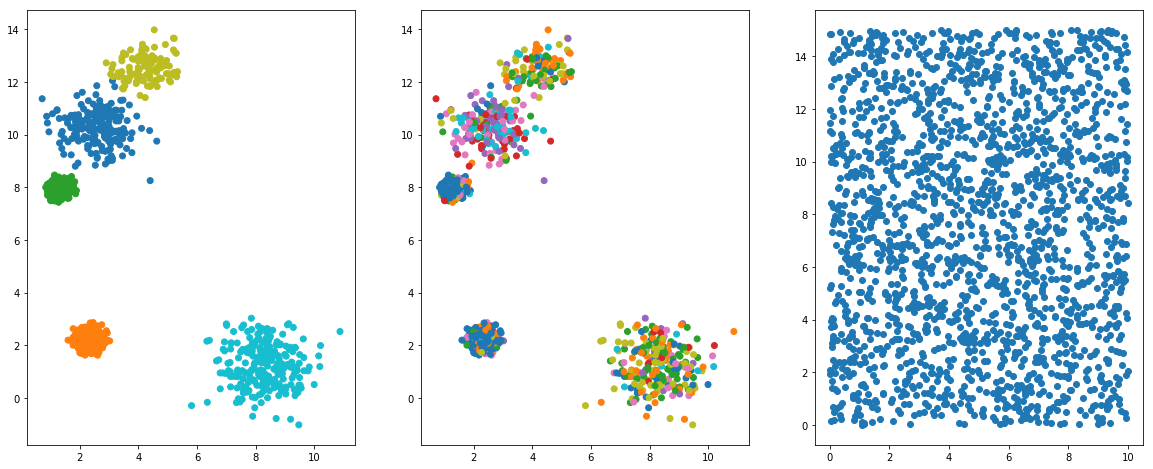

In [175]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:olive", "tab:cyan", "tab:pink", "tab:red", "tab:purple"]

# colors = {0: 'tab:blue', 1:'tab:orange', 2:'tab:green', 3:'tab:red', 4:'tab:cyan'}
# colors_food_type = {
#     "American": "tab:blue", 
#     "Italian": "tab:orange", 
#     "French": "tab:green", 
#     "Spanish": "tab:olive", 
#     "Korean": "tab:cyan", 
#     "Chinese": "tab:pink", 
#     "Japanese": "tab:red", 
#     "Thai": "tab:purple"
# }





fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


x = [b.location_x for b in businesses]
y = [b.location_y for b in businesses]

cmap_business_cluster_id = {cid: color for (cid, color) in zip([0, 1, 2, 3, 4], colors)}
cmap_food_type = {food_type: color for (food_type, color) in zip(u.food_types_flat, colors)}

# color = [cmap_food_type[b.food_type] for b in businesses]
color = [cmap_business_cluster_id[b.food_cluster_id] for b in businesses]

ax1.scatter(x, y, c=[cmap_business_cluster_id[b.food_cluster_id] for b in businesses])
ax2.scatter(x, y, c=[cmap_food_type[b.food_type] for b in businesses])


ax3.scatter([user.location_x for user in users], [user.location_y for user in users])
# ax.legend()
# ax.grid(True)

plt.show()

In [ ]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1, 3, 1)

x = [sum(user.rating_counts.values()) for user in u.users.values() if user.reviewer_type == 3]
y = [user.start_day for user in u.users.values()]

review_types = [user.reviewer_type for user in u.users.values()]

plt.hist([r[2] for r in ratings], 5)
# plt.scatter(x, y)
plt.show()